In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv1D, AveragePooling1D, Dropout
from tensorflow.keras.layers import concatenate, Conv2D, MaxPooling2D, BatchNormalization, Softmax
from tensorflow.keras.models import Model, Sequential
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

tf.random.set_seed(123)

# Probability Library - distributions module

In [3]:
import tensorflow_probability as tfp
tfd = tfp.distributions

In [4]:
normal = tfd.Normal(loc=0, scale=1) # standard normal distribution
print(normal) # event shape is empty for univariate distributions

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


In [5]:
normal.sample(3) # sample from distribution

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.8980837 , -1.8259144 , -0.44441807], dtype=float32)>

In [6]:
normal.prob(0.5) # evaluate the probability density function at a point

<tf.Tensor: shape=(), dtype=float32, numpy=0.35206532>

In [7]:
normal.log_prob(0.5) # evaluate the log of the probability density function at a point 

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0439385>

In [8]:
 # let's look at an example of a distrete probability distribution
bernoulli = tfd.Bernoulli(probs=0.7)
print(bernoulli)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)


In [9]:
bernoulli = tfd.Bernoulli(logits=0.847) # can use logits instead of probs (logits is the value before applying a sigmoid to convert to prob)

In [10]:
bernoulli.sample(3)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 1], dtype=int32)>

In [11]:
bernoulli.prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.69993746>

In [12]:
bernoulli.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.35676432>

In [13]:
batched_bernoulli = tfd.Bernoulli(probs=[0.4, 0.5]) # list of probs will create multiple distributions in one object
print(batched_bernoulli) # batch shape is now 2

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32)


In [14]:
batched_bernoulli.batch_shape

TensorShape([2])

In [15]:
batched_bernoulli.sample(3)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0],
       [1, 0]], dtype=int32)>

In [16]:
batched_bernoulli.prob([1,1]) # need to pass in a list (same for log_prob)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4, 0.5], dtype=float32)>

In [17]:
normal = tfd.Normal(loc=0, scale=1)
normal.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.6383433, -1.1492779, -0.8656427], dtype=float32)>

In [18]:
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [19]:
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [20]:
np.log(normal.prob(0))

-0.9189385

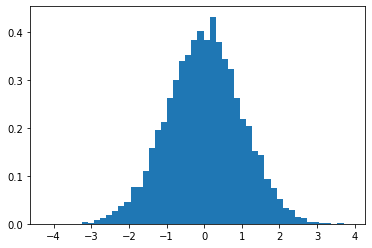

In [21]:
# plot normal distribution
plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

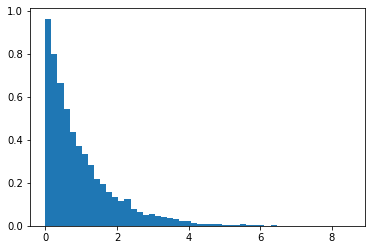

In [22]:
exponential = tfd.Exponential(rate=1)
plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

In [23]:
bernoulli = tfd.Bernoulli(probs=0.8)
bernoulli.sample(20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int32)>

In [24]:
batched_bernoulli = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
batched_bernoulli.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1]], dtype=int32)>

In [25]:
probs = [[[0.5, 0.5],
          [0.8, 0.3],
          [0.25, 0.75]]]
batched_bernoulli_2D = tfd.Bernoulli(probs=probs)
print(batched_bernoulli_2D)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[1, 3, 2], event_shape=[], dtype=int32)


In [26]:
batched_bernoulli_2D.sample(3)

<tf.Tensor: shape=(3, 1, 3, 2), dtype=int32, numpy=
array([[[[0, 1],
         [0, 0],
         [0, 1]]],


       [[[0, 0],
         [0, 0],
         [0, 1]]],


       [[[1, 0],
         [0, 1],
         [1, 0]]]], dtype=int32)>

In [27]:
batched_bernoulli_2D.prob([[[0, 1],
                            [1, 0],
                            [0, 0]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5 , 0.5 ],
        [0.8 , 0.7 ],
        [0.75, 0.25]]], dtype=float32)>

## Multivariate distributions

In [28]:
# multivariate Gaussian
mv_normal = tfd.MultivariateNormalDiag(loc=[-1, 0.5], scale_diag=[1, 1.5])
print(mv_normal) # event shape is now 2

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)


In [29]:
mv_normal.event_shape

TensorShape([2])

In [30]:
mv_normal.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.4895833 ,  1.9171745 ],
       [-1.5054669 ,  0.49480933],
       [ 0.30087698,  1.0777931 ]], dtype=float32)>

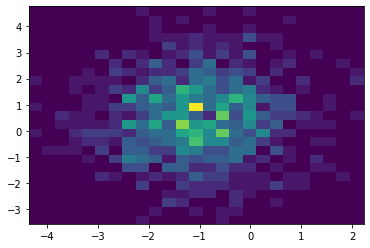

In [31]:
_ = plt.hist2d(mv_normal.sample(1000)[:,0], mv_normal.sample(1000)[:,1], bins=25)

In [32]:
mv_normal.log_prob([-0.2, 1.8])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.9388978>

In [33]:
batched_mv_normal = tfd.MultivariateNormalDiag(loc=[[-1,0.5],[2,0],[-0.5,1.5]], scale_diag=[[1,1.5],[2,0.5],[1,1]]) # last dim is event size
print(batched_mv_normal) # batch shape = 3 and event shape = 2

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)


In [34]:
batched_mv_normal.sample(2) # shape --> (sample, batch, event)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[-1.9684916 ,  2.1105673 ],
        [ 5.862305  , -0.63744444],
        [-2.330161  ,  2.0273616 ]],

       [[-0.30110425, -1.7083147 ],
        [ 2.8151371 ,  0.69786173],
        [ 1.2758927 , -1.4252079 ]]], dtype=float32)>

In [35]:
normal_diag = tfd.MultivariateNormalDiag(loc=[0,1], scale_diag=[1,2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [36]:
normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.29961362,  1.9561107 ],
       [-0.927401  ,  2.1648543 ],
       [-0.05747294,  3.1274722 ],
       [ 0.1547592 , -0.1497984 ],
       [-1.521612  , -0.30925465],
       [-0.03509409, -0.44904304],
       [-1.300846  ,  2.4802053 ],
       [-0.9206835 , -0.88790846],
       [-0.5850459 , -4.250524  ],
       [-0.9080883 ,  0.9639082 ]], dtype=float32)>

(-4.002974855899811, 4.111113655567169, -6.779908633232116, 8.5740651845932)

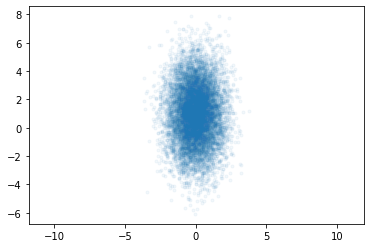

In [37]:
plt.scatter(normal_diag.sample(10000)[:,0], normal_diag.sample(10000)[:,1], marker='.', alpha=0.05)
plt.axis('equal')

In [38]:
norm_diag_batch = tfd.MultivariateNormalDiag(loc=[[0,0],[0,0],[0,0]], scale_diag=[[1,2],[2,1],[2,2]])
norm_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [39]:
samples = norm_diag_batch.sample(4)
samples

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[ 0.00455205, -1.2296776 ],
        [-0.14299452, -1.0030683 ],
        [-0.19874515, -0.62147903]],

       [[ 0.06312805,  3.0725172 ],
        [ 2.0431945 ,  0.41096577],
        [-0.20280239,  1.4791254 ]],

       [[-0.58614415, -1.201455  ],
        [-4.0512257 ,  1.5814992 ],
        [-3.1452112 ,  3.1706932 ]],

       [[ 0.23380812,  0.35992718],
        [ 1.2243274 ,  0.135624  ],
        [-2.445689  ,  2.4657664 ]]], dtype=float32)>

In [40]:
norm_diag_batch.log_prob(samples)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-2.720048 , -3.0366533, -3.2773883],
       [-3.713062 , -3.137301 , -3.502789 ],
       [-2.8832436, -5.833148 , -5.7173777],
       [-2.5745509, -2.7275934, -4.7318463]], dtype=float32)>

(10000, 3, 2)


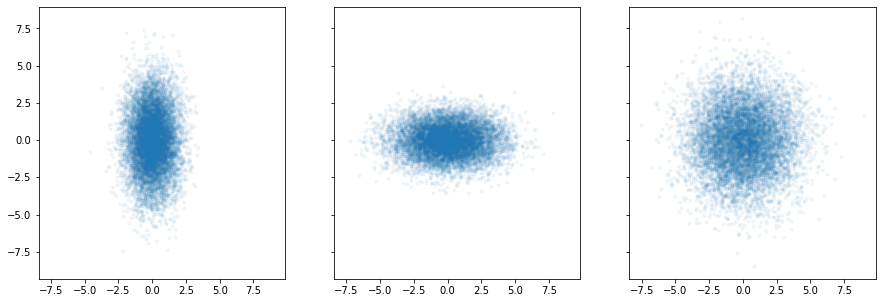

In [41]:
plt_sample_batch = norm_diag_batch.sample(10000)
print(plt_sample_batch.shape)
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
for i in range(3):
  axes[i].scatter(plt_sample_batch[:,i,0], plt_sample_batch[:,i,1], marker='.', alpha=0.05)

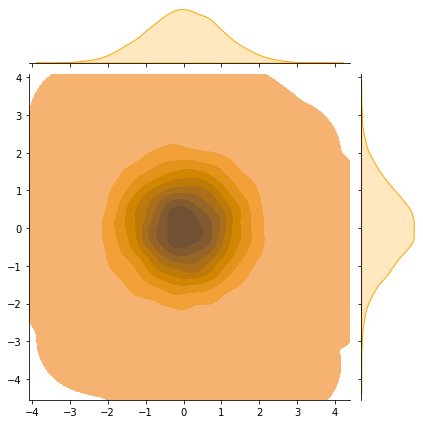

In [42]:
spherical_2d_gaussian = tfd.MultivariateNormalDiag(loc=[0,0], scale_diag=[1,1])
samples = spherical_2d_gaussian.sample(10000)
x1 = samples[:,0]
x2 = samples[:,1]
sns.jointplot(x=x1,y=x2, kind='kde', fill=True, thresh=0, color='orange')

#### Previous distributions using MultivariateNormalDiag only had nonzero values in the diagonal of the covariance matrix so they could not appear diagonal on the plot above. Use MultivariateNormalFullTril to make full covariance matrix.  It is better to use this method (using lower-triangular matrix) than definining full covariance matrix since not all matrices work as covariance matrices.  They need to be symmetric and positive semi-definite.  If you define a lower-triangular matrix (L) with all diagonal entries positive, the covariance matrix calculated as LL^T is guarranteed to be a valid covariance matrix.  If you want to use a certain covariance matrix, convert it into lower-triangular matrix with tf.linalg.cholesky()

In [43]:
# scale_tril is a lower-triangular matrix (i.e. all values in upper right corner are 0)
mu = [0,0]
scale_tril = [[1,0],
              [0.6,0.8]]
sigma = tf.matmul(tf.constant(scale_tril), tf.transpose(tf.constant(scale_tril))) # covariance matrix = scale_tril * scale_tril^T
print(sigma) # this is the covariance matrix

tf.Tensor(
[[1.  0.6]
 [0.6 1. ]], shape=(2, 2), dtype=float32)


In [44]:
nonspherical_2d_gaussian = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)
print(nonspherical_2d_gaussian.mean())
print(nonspherical_2d_gaussian.covariance())

tf.Tensor([0. 0.], shape=(2,), dtype=float32)
tf.Tensor(
[[1.  0.6]
 [0.6 1. ]], shape=(2, 2), dtype=float32)


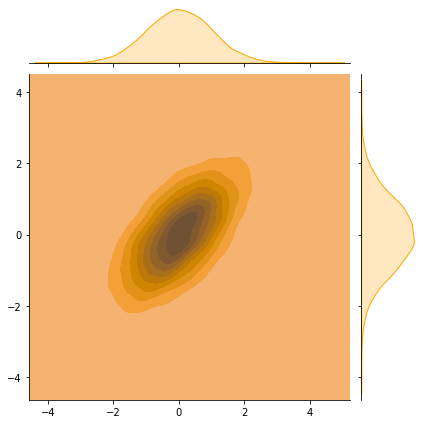

In [45]:
samples = nonspherical_2d_gaussian.sample(10000)
x1 = samples[:,0]
x2 = samples[:,1]
sns.jointplot(x=x1,y=x2, kind='kde', fill=True, thresh=0, color='orange')

In [46]:
# covert full covariance matrix into lower-traingular matrix (Cholesky decomposition)
sigma = [[10.,5.],[5.,10.]]
scale_tril = tf.linalg.cholesky(sigma)
scale_tril # can now use this to define a multivariate normal distribution

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.1622777, 0.       ],
       [1.5811388, 2.738613 ]], dtype=float32)>

In [47]:
tf.matmul(scale_tril, tf.transpose(scale_tril)) # confirmation

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10.,  5.],
       [ 5., 10.]], dtype=float32)>

## Independent distribution

In [48]:
mv_normal = tfd.MultivariateNormalDiag(loc=[-1,0.5], scale_diag=[1,1.5])
mv_normal

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [49]:
mv_normal.log_prob([-0.2,1.8]) # only one value

<tf.Tensor: shape=(), dtype=float32, numpy=-2.9388978>

In [50]:
batched_normal = tfd.Normal(loc=[-1,0.5], scale=[1,1.5])
batched_normal

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [51]:
batched_normal.log_prob([-0.2,1.8]) # two values

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2389386, -1.699959 ], dtype=float32)>

In [52]:
# independent distribution combines individual batched distributions into joint distribution 
# this is like considering individual features in a model (each with their own distriubtion) but consider how they relate to each other
# independent function 'absorbs' batch dimensions into event dimensions
independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=1) # this makes it equivalent to mv_normal
independent_normal # now batch_shape is empty and event_shape is 2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [53]:
independent_normal.log_prob([-0.2, 1.8]) # now only one value

<tf.Tensor: shape=(), dtype=float32, numpy=-2.9388976>

In [54]:
batched_normal = tfd.Normal(loc=[[-1,0.5],[0,1],[0.3,-0.1]], scale=[[1,1.5],[0.2,0.8],[2,1]])
batched_normal # batch shape has two dimensions

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [55]:
independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=1)
independent_normal # since we are only reinterpreting 1 dim, it is always right-most so now batch shape is 3 and event shape is 2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

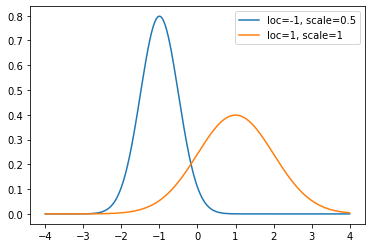

In [56]:
locs = [-1,1]
scales = [0.5, 1]
batch_normal = tfd.Normal(loc=locs, scale=scales)

t = np.linspace(-4,4,10000)
densities = batch_normal.prob(np.repeat(t[..., np.newaxis], 2, axis=1))
sns.lineplot(x=t, y=densities[:,0], label = 'loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(x=t, y=densities[:,1], label = 'loc={}, scale={}'.format(locs[1], scales[1]))
plt.legend()
plt.show()

In [57]:
bivariate_normal = tfd.Independent(batch_normal, reinterpreted_batch_ndims=1)
bivariate_normal

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

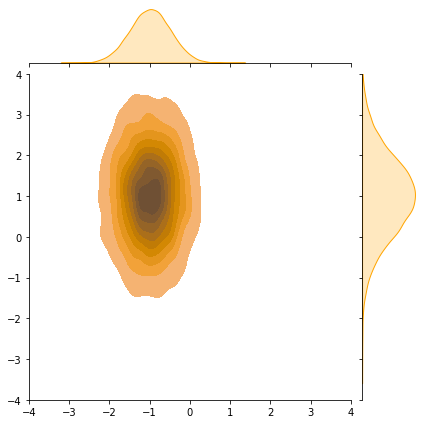

In [58]:
samples = bivariate_normal.sample(10000)
x1 = samples[:,0]
x2 = samples[:,1]
sns.jointplot(x=x1,y=x2, kind='kde', fill=True, color='orange', xlim=[-4,4], ylim=[-4,4])

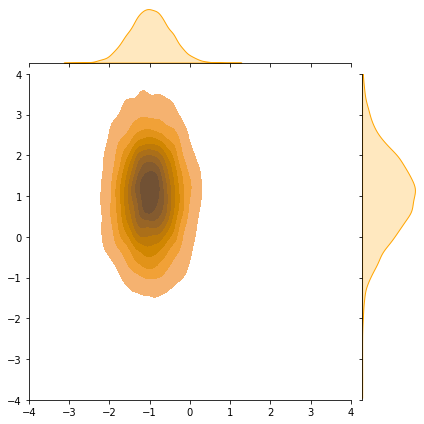

In [59]:
bivariate_normal = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales) # equivalent to using Independent
samples = bivariate_normal.sample(10000)
x1 = samples[:,0]
x2 = samples[:,1]
sns.jointplot(x=x1,y=x2, kind='kde', fill=True, color='orange', xlim=[-4,4], ylim=[-4,4])

In [60]:
loc_grid = [[-100, -100],
            [100, 100],
            [0, 0]]
scale_grid = [[1, 10],
              [1, 10],
              [1, 1]]
batch_normal_3by2 = tfd.Normal(loc=loc_grid, scale=scale_grid)
batch_normal_3by2

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [61]:
normal_batch3_event2 = tfd.Independent(batch_normal_3by2) # default is to absorb every batch dim into event except first
normal_batch3_event2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [62]:
normal_batch3_event2.log_prob(value=[[-10, -10],
                                     [100, 100],
                                     [1, 1]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.0946404e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [63]:
normal_batch1_event3by2 = tfd.Independent(batch_normal_3by2, reinterpreted_batch_ndims=2)
normal_batch1_event3by2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[3, 2] dtype=float32>

In [64]:
normal_batch1_event3by2.log_prob(value=[[-10, -10],
                                        [100, 100],
                                        [1, 1]])

<tf.Tensor: shape=(), dtype=float32, numpy=-4101.6187>

## Naive Bayes Classifier to newsgroups data set

In [65]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
newsgroups_data = fetch_20newsgroups(subset='train')

In [67]:
print(newsgroups_data['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [68]:
print(newsgroups_data['data'][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [69]:
newsgroups_data['target'][0]

7

In [70]:
newsgroups_data['target_names'][7]

'rec.autos'

In [71]:
n_docs = len(newsgroups_data['data'])
count_vectorizer = CountVectorizer(input='content', binary=True, max_df=0.25, min_df=1.01/n_docs)
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data['data'])

In [72]:
binary_bag_of_words.shape

(11314, 56365)

In [73]:
inv_vocab = {value:key for key,value in count_vectorizer.vocabulary_.items()}

In [74]:
y = newsgroups_data['target']
n_classes = y.max() + 1
n_words = binary_bag_of_words.shape[1]

# smoothing parameter
alpha = 1e-6

theta = np.zeros([n_classes, n_words]) # this will stor conditional prob p(x|y) for Naive Bayes classifier
for c in range(n_classes):
  class_mask = (y == c)
  N = class_mask.sum() # num of articles in class to make apriori probability p(y)
  theta[c,:] = (binary_bag_of_words[class_mask,:].sum(axis=0) + alpha) / (N + alpha*2) # alpha*2 in denom since it is bernoulli distribution where it can be 2 values


In [75]:
most_probable_word_ix = theta.argmax(axis=1)
for j, ix in enumerate(most_probable_word_ix):
  print('Most probable word in class {} is {}'.format(newsgroups_data['target_names'][j], inv_vocab[ix]))

Most probable word in class alt.atheism is people
Most probable word in class comp.graphics is graphics
Most probable word in class comp.os.ms-windows.misc is windows
Most probable word in class comp.sys.ibm.pc.hardware is thanks
Most probable word in class comp.sys.mac.hardware is mac
Most probable word in class comp.windows.x is window
Most probable word in class misc.forsale is sale
Most probable word in class rec.autos is car
Most probable word in class rec.motorcycles is dod
Most probable word in class rec.sport.baseball is he
Most probable word in class rec.sport.hockey is ca
Most probable word in class sci.crypt is clipper
Most probable word in class sci.electronics is use
Most probable word in class sci.med is reply
Most probable word in class sci.space is space
Most probable word in class soc.religion.christian is god
Most probable word in class talk.politics.guns is people
Most probable word in class talk.politics.mideast is people
Most probable word in class talk.politics.mi

In [76]:
batched_bernoulli = tfd.Bernoulli(probs=theta) # this allows us to take random samples from a distribution that describes our data
batched_bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[20, 56365] event_shape=[] dtype=int32>

In [77]:
p_x_given_y = tfd.Independent(batched_bernoulli, reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [78]:
sample = p_x_given_y.sample(10)
sample.shape

TensorShape([10, 20, 56365])

In [79]:
chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [80]:
class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [81]:
count_vectorizer.inverse_transform(class_sample)

[array(['01', '1349', '14', '1993', '22', '24', '74', 'again', 'am',
        'answered', 'anything', 'anyway', 'baker', 'because', 'beginning',
        'being', 'believe', 'call', 'christians', 'cited', 'civil',
        'collections', 'commenting', 'community', 'concerning', 'course',
        'day', 'decision', 'did', 'died', 'discounted', 'dss', 'east',
        'eastern', 'emotional', 'engineers', 'face', 'famous', 'gain',
        'gives', 'god', 'greeks', 'had', 'he', 'headed', 'hearing', 'him',
        'his', 'hurt', 'imbecile', 'imo', 'instant', 'interested',
        'interpret', 'interpretations', 'jesus', 'jewish', 'kingdom',
        'last', 'learned', 'least', 'less', 'liberals', 'libertarian',
        'life', 'likewise', 'logic', 'made', 'many', 'means', 'minds',
        'mouth', 'mt', 'nature', 'newsgroup', 'next', 'non', 'now',
        'objectivity', 'opposed', 'our', 'over', 'own', 'page', 'part',
        'people', 'peter', 'places', 'plurality', 'prophesied',
        'psych

## Broadcasting
- prepend 1s to the smaller shape
 - below, b has shape 1 while a has shape 2 so adds extra dim to b (3 --> 1x3)
- check that the axes of both arrays have sizes that are either equal or 1
  - below, b is (1x3) and a is (4x1), so in both dims, one of the variables has a value of 1
- stretch the arrays in their size-1 axes
  - below, b is broadcasted from 1x3 --> 4x3 and a is broadcasted from 4x1 --> 4x3
- broadcasting rule for TensorFlow is same as numpy

In [82]:
a = np.array([[1],
             [2],
             [3],
             [4]])
b = np.array([0,1,2])
a+b

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [83]:
# slow way to define batch of gaussian distributions
batch_normal = tfd.Normal(loc=[0,0,0,1,1,1], scale=[1,10,100,1,10,100])

# faster with broadcasting
loc = [[0.],
       [1.]]
scale = [1., 10., 100.]
faster_batch_normal = tfd.Normal(loc=loc, scale=scale)
faster_batch_normal

<tfp.distributions.Normal 'Normal' batch_shape=[2, 3] event_shape=[] dtype=float32>

In [84]:
faster_batch_normal.loc

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [1.]], dtype=float32)>

In [85]:
faster_batch_normal.scale

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([  1.,  10., 100.], dtype=float32)>

In [86]:
sample1 = tf.random.uniform((2,1))
sample2 = tf.random.uniform((1,3))
sample3 = tf.random.uniform((1,1))
# broadcasting works for prob and log_prob too
print(faster_batch_normal.prob(sample1)) # broadcast on second axis
print(faster_batch_normal.prob(sample2)) # broadcast on first axis
print(faster_batch_normal.prob(sample3)) # broadcast on both axes

tf.Tensor(
[[0.3955263  0.03989079 0.00398942]
 [0.38878566 0.03988393 0.00398941]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.27519363 0.03984608 0.00398942]
 [0.39515018 0.03984267 0.00398924]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.39302874 0.03988827 0.00398942]
 [0.2833567  0.03975797 0.00398929]], shape=(2, 3), dtype=float32)


In [87]:
# multivariate broadcasting
single_mvt_normal = tfd.MultivariateNormalDiag(loc=[0,0], scale_diag=[1, 0.5])
single_mvt_normal

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [88]:
single_mvt_normal.loc

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [89]:
single_mvt_normal.covariance()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.  , 0.  ],
       [0.  , 0.25]], dtype=float32)>

In [90]:
# final axis determines event shape - all others are in batch shape
loc = [[0, 0], # 2x2 --> first 2 is batch shape, second 2 is event shape
       [1, 1]]
scale_diag = [1,0.5] # broadcast from 1x2 to 2x2

batch_mvt_normal = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
batch_mvt_normal

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2] event_shape=[2] dtype=float32>

In [91]:
batch_mvt_normal.parameters

{'allow_nan_stats': True,
 'experimental_use_kahan_sum': False,
 'loc': ListWrapper([ListWrapper([0, 0]), ListWrapper([1, 1])]),
 'name': 'MultivariateNormalDiag',
 'scale_diag': ListWrapper([1, 0.5]),
 'scale_identity_multiplier': None,
 'validate_args': False}

In [92]:
# tf interprets last dim as event shape and broadcasts the rest

In [93]:
exp = tfd.Exponential(rate=[[1, 1.5, 0.8],[0.3, 0.4, 1.8]])
exp

<tfp.distributions.Exponential 'Exponential' batch_shape=[2, 3] event_shape=[] dtype=float32>

In [94]:
ind_exp = tfd.Independent(exp)
ind_exp

<tfp.distributions.Independent 'IndependentExponential' batch_shape=[2] event_shape=[3] dtype=float32>

In [95]:
ind_exp.sample(4)

<tf.Tensor: shape=(4, 2, 3), dtype=float32, numpy=
array([[[2.5002031 , 0.15172158, 4.9000163 ],
        [0.33312798, 2.1559024 , 0.06900347]],

       [[0.4158712 , 0.8248239 , 0.9838752 ],
        [9.955382  , 0.21584663, 0.05393133]],

       [[2.0060952 , 0.924484  , 1.978281  ],
        [1.9934334 , 9.479193  , 0.18704863]],

       [[0.34175396, 0.7107496 , 0.8920651 ],
        [3.8072941 , 2.4762235 , 0.55219793]]], dtype=float32)>

In [96]:
normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5,1],[0.1,0],[0,0.2]],
                                                  scale_diag=[[2,3],[1,3],[4,4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [98]:
normal_distributions.sample(5)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ 2.3771992 , -2.975975  ],
        [-0.0223593 , -1.288198  ],
        [ 6.9093914 , -1.9124491 ]],

       [[-1.9667206 ,  4.5304074 ],
        [-0.5863861 ,  2.0480435 ],
        [-9.206886  , -3.6135972 ]],

       [[-0.10561389,  5.5344825 ],
        [-1.1098725 , -2.6207862 ],
        [-5.2298284 ,  8.227506  ]],

       [[-0.41352552,  2.1952028 ],
        [ 0.6120653 ,  0.2533899 ],
        [-3.5358655 , -0.06145479]],

       [[-1.2712387 ,  1.7470092 ],
        [ 2.7151504 , -4.372945  ],
        [ 1.6387546 , -0.5194645 ]]], dtype=float32)>

In [100]:
# loc --> (2,2,3)
loc = [[[0.3, 1.5, 1], [0.2, 0.4, 0.6]],
       [[2, 2.3, 8], [1.4, 1, 1.3]]]
# scale_diag --> (3,)
scale_diag = [0.4, 1, 0.7]
# broadcasting will make scale_diag (2,3,3) where last dimension is interpreted as event shape and all others are batch
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [101]:
ind_normal_distributions = tfd.Independent(normal_distributions, reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [102]:
samples = ind_normal_distributions.sample(5)
samples.shape

TensorShape([5, 2, 2, 3])

In [103]:
inp = tf.random.uniform((2,2,3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -6.822392, -68.69079 ], dtype=float32)>

In [104]:
inp = tf.random.uniform((2,3)) # broadcast over batch dim
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -4.9283013, -79.1826   ], dtype=float32)>

In [105]:
inp = tf.random.uniform((9,2,2,3)) # broadcast over samples
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[ -5.718716 , -75.58726  ],
       [ -3.7687728, -83.413994 ],
       [ -5.2406125, -77.65944  ],
       [ -4.7010784, -70.01783  ],
       [ -5.044768 , -68.55484  ],
       [ -6.624671 , -74.679    ],
       [ -5.7885556, -63.95919  ],
       [ -4.2208705, -67.494774 ],
       [ -3.3214355, -71.195526 ]], dtype=float32)>

In [111]:
inp = tf.random.uniform((5,1,2,1)) # shape is either equal to batch/event dim or it is one so it can be broadcast
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ -5.668887 , -60.63614  ],
       [ -4.927368 , -73.370285 ],
       [ -3.9893317, -70.65045  ],
       [ -6.206399 , -62.96297  ],
       [ -5.4048996, -66.20853  ]], dtype=float32)>

In [146]:
def get_data(categories):
  newsgroups_train_data = fetch_20newsgroups(subset='train', categories=categories)
  newsgroups_test_data = fetch_20newsgroups(subset='test', categories=categories)

  n_documents = len(newsgroups_train_data['data'])
  count_vectorizer = CountVectorizer(input='content', binary=True, max_df=0.25, min_df=1.01/n_documents)

  train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
  test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data'])

  return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']), (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [163]:
def laplace_smoothing(labels, binary_data, n_classes):
  n_words = binary_data.shape[1]
  alpha = 0.1
  theta = np.zeros([n_classes, n_words]) # matrix of conditional probs (prob word given class)
  for c_k in range(n_classes):
    class_mask = (labels == c_k)
    N = class_mask.sum()
    theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha) / (N + alpha*2)
  return theta

In [164]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
(train_data, train_labels), (test_data, test_labels) = get_data(categories)
smoothed_counts = laplace_smoothing(train_labels, train_data, len(categories))

To make Naive Bayes classifier, we need three functions:


1.   Compute class priors
2.   build class conditional distributions
3.   put it all together and classify our data



In [165]:
def class_priors(n_classes, labels):
  counts = np.zeros(n_classes)
  for c_k in range(n_classes):
    counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
  priors = counts / np.sum(counts)
  print('The class priors are {}'.format(priors))
  return priors

In [166]:
priors = class_priors(len(categories), train_labels)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [167]:
# Bernoulli distributions
# batch shape --> number of classes
# event shape --> number of words
def make_distribution(probs):
  batch_of_bernoullis = tfd.Bernoulli(probs=probs)
  dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
  return dist

tf_dist = make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

In [168]:
def predict_sample(dist, sample, priors):
  cond_probs = dist.log_prob(sample)
  joint_likelihood = tf.add(np.log(priors), cond_probs) # add rather than multiply since these are log_probs
  norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True) # compute log normalization factor
  log_prob = joint_likelihood - norm_factor # subtracting log normalization factor in log space is equivalent to dividing to get log prob
  return log_prob

In [169]:
log_probs = predict_sample(tf_dist, test_data[0], priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.5459961e+01, -2.3651123e-03, -6.0475769e+00, -4.9437790e+01],
      dtype=float32)>

In [170]:
from sklearn.metrics import f1_score

probabilites = []
for sample in test_data:
  probabilites.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilites = np.asarray(probabilites)
predicted_classes = np.argmax(probabilites, axis=-1)
print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.8496961488207146


In [172]:
# compare my classifier with sklearn's NB classifier (sanity check)
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=0.1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklearn ', f1_score(test_labels, pred, average='macro'))

f1 from sklearn  0.8496961488207146


## Trainable distributions

In [173]:
normal = tfd.Normal(loc=tf.Variable(0, name='loc'), scale=1)
normal.trainable_variables

(<tf.Variable 'loc:0' shape=() dtype=int32, numpy=0>,)

In [174]:
def nll(X_train): # minimize negative log likelihood (loss function) during training
  return -tf.reduce_mean(normal.log_prob(X_train))

Text(0.5, 1.0, 'Training Mean of Normal Dist. on Data with Mean 21')

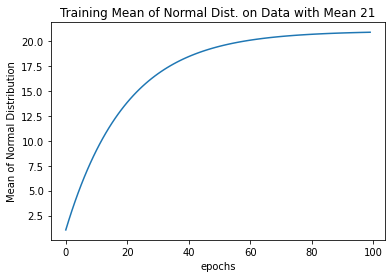

In [192]:
@tf.function
def get_loss_and_grads(X_train):
  with tf.GradientTape() as tape:
    tape.watch(normal.trainable_variables)
    loss = nll(X_train)
  grads = tape.gradient(loss, normal.trainable_variables)
  return loss, grads

X_train = tf.random.normal((1000,), mean=21, stddev=2.1)
normal = tfd.Normal(loc=tf.Variable(0, name='loc', dtype=tf.float32), scale=1)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
num_steps = 100
losses = []
means = []
for _ in range(num_steps):
  loss, grads = get_loss_and_grads(X_train)
  optimizer.apply_gradients(zip(grads, normal.trainable_variables))
  losses.append(loss)
  means.append(normal.loc.numpy())
plt.plot(means)
plt.xlabel('epochs')
plt.ylabel('Mean of Normal Distribution')
plt.title('Training Mean of Normal Dist. on Data with Mean 21')

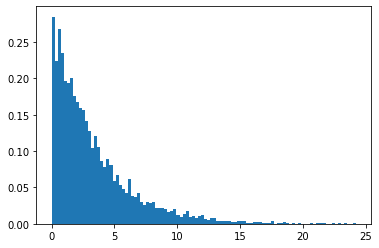

In [193]:
exponential = tfd.Exponential(rate=0.3, name='exp')

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [194]:
exp_train = tfd.Exponential(rate=tf.Variable(1., name='rate'), name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

In [195]:
def nll(X_train, distribution):
  return -tf.reduce_mean(distribution.log_prob(X_train))

In [196]:
@tf.function
def get_loss_and_grads(X_train, distribution):
  with tf.GradientTape() as tape:
    tape.watch(distribution.trainable_variables)
    loss = nll(X_train, distribution)
    grads = tape.gradient(loss, distribution.trainable_variables)
  return loss, grads

In [204]:
def exponential_dist_optimization(data, distribution):
  train_loss_results = []
  train_rate_results = []
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
  num_steps=10
  for i in range(num_steps):
    loss, grads = get_loss_and_grads(data, distribution)
    optimizer.apply_gradients(zip(grads, distribution.trainable_variables))
    rate_value = distribution.rate.value()
    train_loss_results.append(loss)
    train_rate_results.append(rate_value)
    print('Step {:02d}: Loss: {:.3f}: Rate: {:.3f}'.format(i, loss, rate_value))
  return train_loss_results, train_rate_results

In [205]:
exponential = tfd.Exponential(rate=0.3, name='exp')
exp_train = tfd.Exponential(rate=tf.Variable(1., name='rate'), name='exp_train')

sampled_data = exponential.sample(5000)
train_loss_results, train_rate_results = exponential_dist_optimization(sampled_data, exp_train)

Step 00: Loss: 3.342: Rate: 0.883
Step 01: Loss: 3.076: Rate: 0.772
Step 02: Loss: 2.840: Rate: 0.670
Step 03: Loss: 2.640: Rate: 0.578
Step 04: Loss: 2.479: Rate: 0.497
Step 05: Loss: 2.360: Rate: 0.430
Step 06: Loss: 2.282: Rate: 0.379
Step 07: Loss: 2.237: Rate: 0.344
Step 08: Loss: 2.217: Rate: 0.322
Step 09: Loss: 2.210: Rate: 0.310


In [206]:
print('Exact rate: ', exponential.rate.numpy())
print('Pred. rate: ', exp_train.rate.numpy())

Exact rate:  0.3
Pred. rate:  0.3103138


Text(0, 0.5, 'rate')

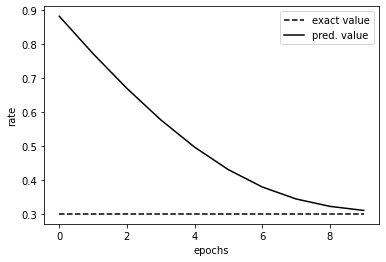

In [209]:
plt.plot(np.arange(10), [exponential.rate.numpy()]*10, '--k', label='exact value')
plt.plot(train_rate_results, 'k', label='pred. value')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('rate')

In [210]:
# train distributions for the Bernoulli example
def make_distribution_withGT(data, labels, nb_classes):
  class_data = []
  train_vars = []
  distributions = []
  for c in range(nb_classes):
    train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high=0.1, size=data.shape[-1])))
    distributions.append(tfd.Bernoulli(probs=train_vars[c]))
    class_mask = (labels == c)
    class_data.append(data[class_mask, :])
  
  for c_num in range(0, nb_classes):
    optimizer = tf.keras.optimizers.Adam() # need a different optimizer for each class
    print('\n%-----------------%')
    print('Class ', c_num)
    print('\n%-----------------%')
    for i in range(0, 100):
      loss, grads = get_loss_and_grads(class_data[c_num], distributions[c_num])
      if i%10 == 0:
        print('iter: {}, loss: {}'.format(i, loss))
      optimizer.apply_gradients(zip(grads, distributions[c_num].trainable_variables))
      eta = 1e-3 # don't let probs get to 0 (takes the place of laplace smoothing)
      clipped_probs = tf.clip_by_value(distributions[c_num].trainable_variables, clip_value_max=1, clip_value_min=eta) # make sure values are between 0-1
      train_vars[c_num] = tf.squeeze(clipped_probs)
  
  dist = tfd.Bernoulli(probs=train_vars)
  dist = tfd.Independent(dist, reinterpreted_batch_ndims=1)
  print(dist)
  return dist

In [212]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
(train_data, train_labels), (test_data, test_labels) = get_data(categories)
smoothed_counts = laplace_smoothing(train_labels, train_data, len(categories))
priors = class_priors(len(categories), train_labels)
tf_dist = make_distribution(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [213]:
GT_dist = make_distribution_withGT(train_data, train_labels, 4)


%-----------------%
Class  0

%-----------------%
iter: 0, loss: 0.07829142328263576
iter: 10, loss: 0.06895162070291551
iter: 20, loss: 0.060259620940244056
iter: 30, loss: 0.05221232012238144
iter: 40, loss: 0.04475237501606744
iter: 50, loss: 0.03784248179264012
iter: 60, loss: 0.031454056499373155
iter: 70, loss: 0.0255391077976835
iter: 80, loss: 0.020057067638894078
iter: 90, loss: 0.014961098519711927

%-----------------%
Class  1

%-----------------%
iter: 0, loss: 0.07139670601958
iter: 10, loss: 0.06206100358918166
iter: 20, loss: 0.053272791869167974
iter: 30, loss: 0.04510592085205653
iter: 40, loss: 0.0375382177880017
iter: 50, loss: 0.03053163987016441
iter: 60, loss: 0.024057340673917012
iter: 70, loss: 0.018086635668421024
iter: 80, loss: 0.012575023601573986
iter: 90, loss: 0.007472961345514648

%-----------------%
Class  2

%-----------------%
iter: 0, loss: 0.07825553119981078
iter: 10, loss: 0.06916011747660804
iter: 20, loss: 0.060784520609927284
iter: 30, loss: 0

In [214]:
for dist in [GT_dist, tf_dist]:
  probabilites = []
  for sample in test_data:
    probabilites.append(predict_sample(dist, sample, priors))
  probabilites = np.asarray(probabilites)
  predicted_classes = np.argmax(probabilites, axis=-1)
  print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.8279294479471269
f1  0.8496961488207146
